In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/kaggle/input/houseprice/house_price.csv')

print(data.head())

X = data['area'].values
y = data['price'].values
X = X.reshape(-1, 1)

X_b = np.c_[np.ones((X.shape[0], 1)), X]


   area  price
0   147     49
1   150     50
2   153     51
3   158     54
4   163     58


In [7]:
def predict(X, weights):
    return X.dot(weights)

def compute_loss(X, y, weights):
    predictions = predict(X, weights)
    return np.mean((predictions - y.reshape(-1, 1)) ** 2)

In [3]:
def gradient_descent(X, y, learning_rate=0.0001, epochs=1000):
    m = len(y)
    weights = np.zeros((X.shape[1], 1))
    losses = []

    for epoch in range(epochs):
        predictions = predict(X, weights)
        errors = predictions - y.reshape(-1, 1)
        
        weights -= (learning_rate / m) * (X.T.dot(errors))
        
        loss = compute_loss(X, y, weights)
        losses.append(loss)

    return weights, losses


In [8]:
weights, losses = gradient_descent(X_b, y, learning_rate=0.00001, epochs=1000)

print("Trọng số tối ưu:", weights)


Trọng số tối ưu: [[0.00061041]
 [0.35736381]]


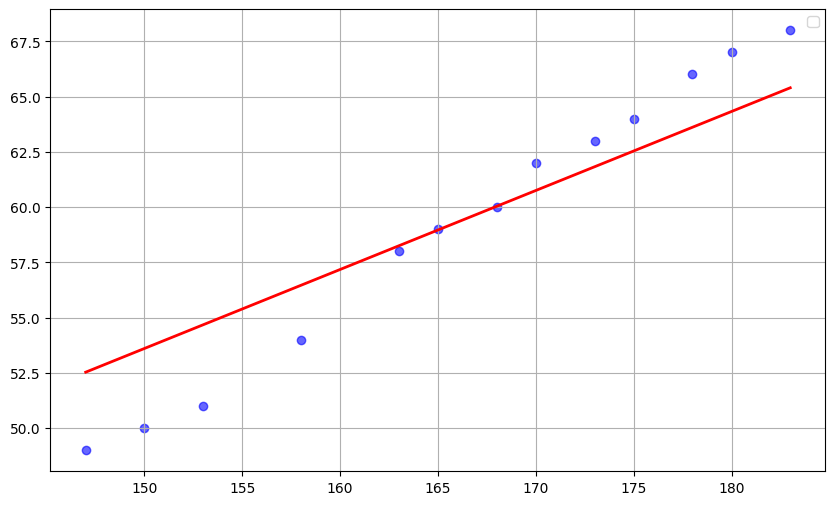

In [9]:
predictions = predict(X_b, weights)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6)
plt.plot(X, predictions, color='red', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()
